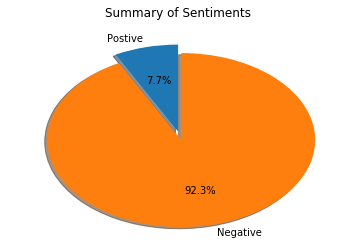

In [4]:
import nltk
import csv
import matplotlib.pyplot as plt
from textblob import TextBlob

with open('csvfile.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=';')
    numl = []
    feedl = []
    polarpos = []
    polarneg = []
    polar_pos = 0
    polar_neg = 0
    
    for row in  readCSV:
        num = row[0]
        feed = row[1]
        blob = TextBlob(feed)
        polar = blob.sentiment.polarity
        if polar <= 0:
            polar_neg = 1
            polarneg.append(polar_neg)
            
        else:
            polar_pos = 1
            polarpos.append(polar_pos)
        
        
        numl.append(num)
        feedl.append(feed) 

    length = [len(polarpos),len(polarneg)]
    slices = [sum(polarpos),sum(polarneg)]

    activities = ['Postive','Negative']

    plt.pie(slices,labels=activities,startangle=90,autopct='%1.1f%%',shadow='True',explode=(0,0.1))
    plt.title("Summary of Sentiments")
    plt.show()


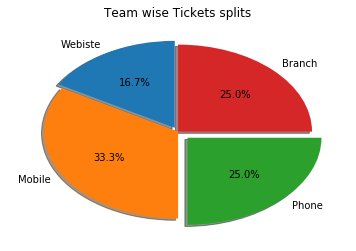

In [3]:
import nltk
with open('csvfile.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=';')
    feedl = []
    polarpos = []
    polarneg = []
    polar_pos = 0
    polar_neg = 0
    web_cnt  = 0 
    phone_cnt = 0
    mobile_cnt = 0
    branch_cnt = 0
                
    for row in  readCSV:
        feed = row[1]
        blob = TextBlob(feed)
        polar = blob.sentiment.polarity
        if polar <= 0:
            with open('types.txt') as txtfile:
                readTXT = csv.reader(txtfile, delimiter = ';')
                
                numl = []
                channell = []
                subtypel = []
                
                for row2 in readTXT:
                    num = row2[0]
                    channel = row2[1]
                    subtype = row2[2]
                    
                    numl.append(num)
                    channell.append(channel)
                    subtypel.append(subtype)
                
                feedlist = list(feed.split(" "))
                
                for (chn) in feedlist:
                    if chn in channell:
                        if chn == 'branch':
                            branch_cnt = branch_cnt + 1
                        if chn == 'website':
                            web_cnt = web_cnt + 1
                        if chn == 'mobile':
                            mobile_cnt = mobile_cnt + 1
                        if chn == 'phone':
                            phone_cnt = phone_cnt + 1
                            
                        
    length = [len(polarpos),len(polarneg)]
    slices = [web_cnt,mobile_cnt,phone_cnt,branch_cnt]    
    activities = ['Webiste','Mobile','Phone','Branch']

    plt.pie(slices,labels=activities,startangle=90,autopct='%1.1f%%',shadow='True',explode=(0.05,0,0.1,0))
    plt.title("Team wise Tickets splits")
    plt.show()